## HW Supervised Learning

### Youtube Views Prediction
Memprediksi views pada video youtube dengan menggunakan angka statistik atau atribut lain pada videonya.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from imblearn.over_sampling import SMOTE

In [3]:
df = pd.read_excel('dataset/youtube_statistics.xlsx')
df.head(2)

,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed,description,No_tags,desc_len,len_title,publish_date
0,2017-11-14,Sharry Mann: Cute Munda ( Song Teaser) | Parmi...,Lokdhun Punjabi,1,12:20:39,"sharry mann|""sharry mann new song""|""sharry man...",1096327,33966,798,882,False,False,False,Presenting Sharry Mann latest Punjabi Song Cu...,15,920,81,2017-11-12
1,2017-11-14,"पीरियड्स के समय, पेट पर पति करता ऐसा, देखकर दं...",HJ NEWS,25,05:43:56,"पीरियड्स के समय|""पेट पर पति करता ऐसा""|""देखकर द...",590101,735,904,0,True,False,False,"पीरियड्स के समय, पेट पर पति करता ऐसा, देखकर दं...",19,2232,58,2017-11-13


## Exploratory Data Analysis (EDA)

1. Apa kategori video dengan views terbanyak

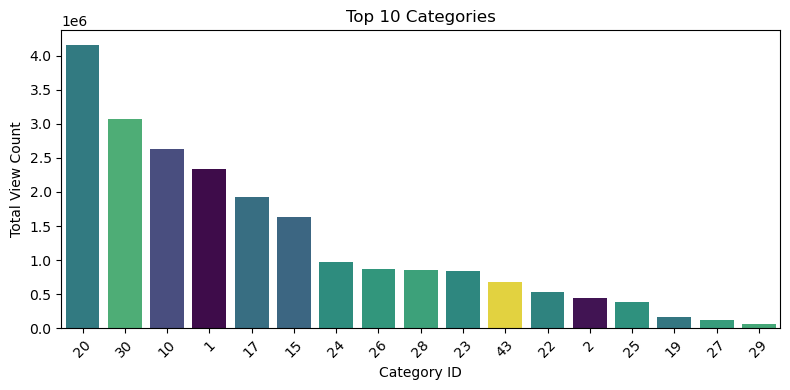

In [4]:
# Membuat top_categories_sorted dengan proses sorting berdasarkan views secara descending
top_categories = df.groupby('category_id')['views'].mean().reset_index()
top_categories_sorted = top_categories.sort_values(by='views', ascending=False)
top_categories_sorted

plt.figure(figsize=(8, 4))
sns.barplot(
    data=top_categories_sorted,
    x='category_id',
    y='views',
    hue='category_id',
    palette='viridis',
    order=top_categories_sorted['category_id'],
    legend=False
)
plt.title('Top 10 Categories')
plt.xlabel('Category ID')
plt.ylabel('Total View Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


2. Apa Channel youtube dengan view terbanyak

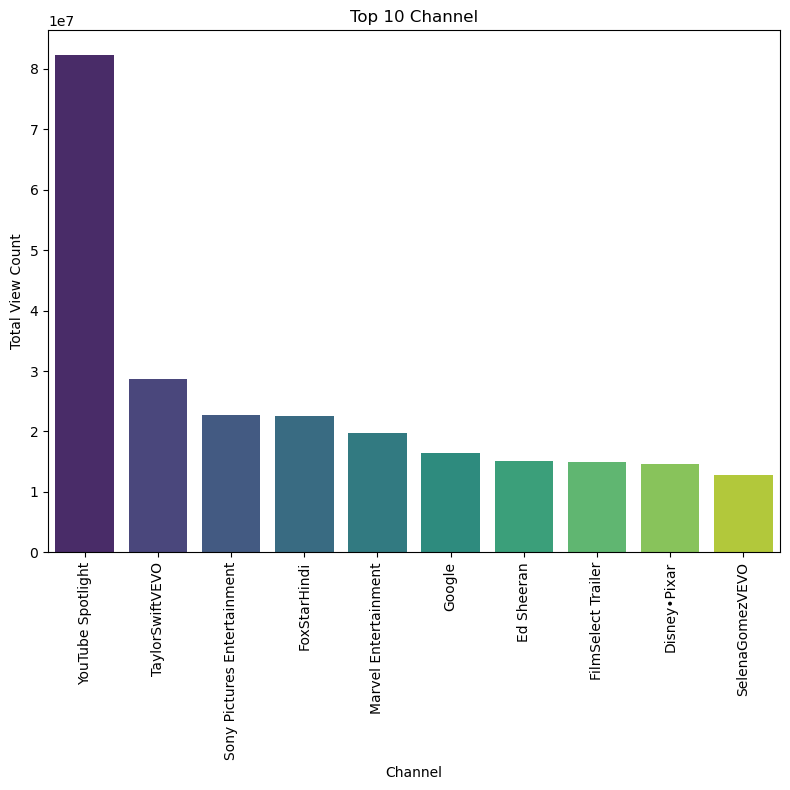

In [5]:
title_top = df.groupby('channel_title')['views'].mean().reset_index()
title_top_sorted = title_top.sort_values(by='views', ascending=False).head(10)
plt.figure(figsize=(8, 8))
sns.barplot(
    data=title_top_sorted,
    x='channel_title',
    y='views',
    hue='channel_title',
    palette='viridis',
    order=title_top_sorted['channel_title'],
    legend=False
)
plt.title('Top 10 Channel')
plt.xlabel('Channel')
plt.ylabel('Total View Count')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

3. apakah ada hubungan antara banyaknya jumlah view dan jumlah like 

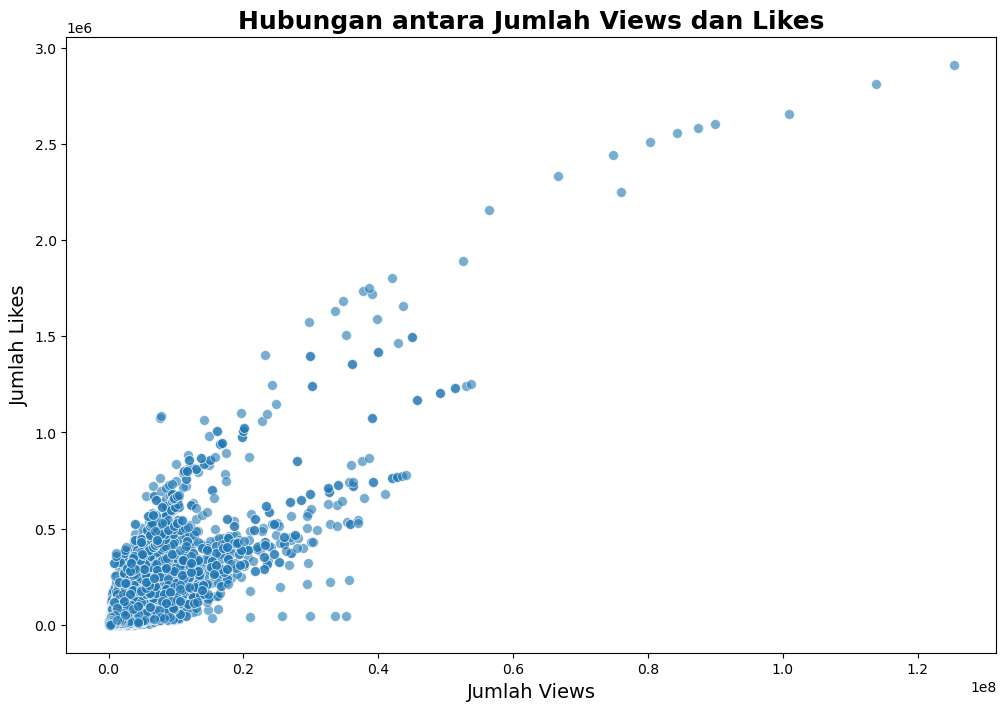

In [6]:
plt.figure(figsize=(12, 8))

# Membuat scatter plot menggunakan Seaborn
sns.scatterplot(
    x='views',          # Sumbu X: Kolom 'views'
    y='likes',          # Sumbu Y: Kolom 'likes'
    data=df,            # Sumber data: DataFrame yang sudah dimuat
    alpha=0.6,          # Mengatur transparansi titik untuk melihat kepadatan data
    edgecolor='w',      # Warna pinggiran titik (putih)
    s=50                # Ukuran titik
)

# 6. Tambahkan label dan judul untuk plot
plt.title(
    'Hubungan antara Jumlah Views dan Likes',
    fontsize=18,
    fontweight='bold'
)
plt.xlabel('Jumlah Views', fontsize=14)
plt.ylabel('Jumlah Likes', fontsize=14)

# 7. Tampilkan plot
plt.show()


In [7]:
#korelasi views dan likes
correlation = df['views'].corr(df['likes'])
print(f'Korelasi antara views dan likes sebesar: {correlation:.2f}')

Korelasi antara views dan likes sebesar: 0.85


4. apakah ada perbedaan views ketika kolom komentar didisable atau tidak

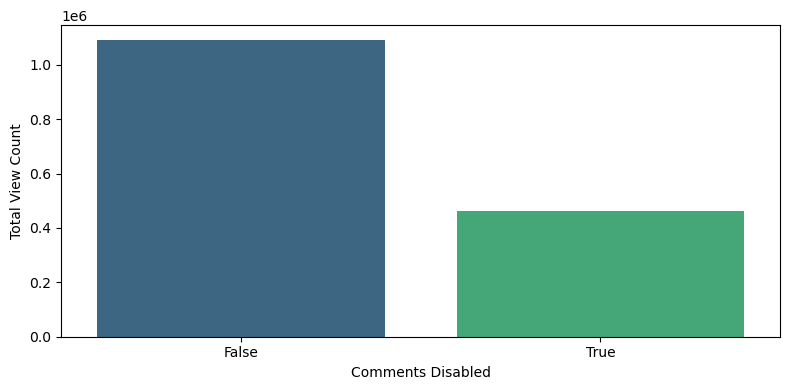

,comments_disabled,views
0,False,1.091630e+06
1,True,4.636920e+05


In [8]:
comment = df.groupby('comments_disabled')['views'].mean().reset_index()
plt.figure(figsize=(8, 4))
sns.barplot(
    data=comment,
    x='comments_disabled',
    y='views',
    hue='comments_disabled',
    palette='viridis',
    order=comment['comments_disabled'],
    legend=False
)

plt.xlabel('Comments Disabled')
plt.ylabel('Total View Count')
plt.tight_layout()
plt.show()
comment

5. video youtube dengan views terbanyak

In [9]:
top_videos = df.sort_values(by='views', ascending=False).head(5)
top_videos[['channel_title','title','category_id','views','likes']]


,channel_title,title,category_id,views,likes
5300,YouTube Spotlight,YouTube Rewind: The Shape of 2017 | #YouTubeRe...,24,125432237,2912710
5019,YouTube Spotlight,YouTube Rewind: The Shape of 2017 | #YouTubeRe...,24,113876217,2811216
4838,YouTube Spotlight,YouTube Rewind: The Shape of 2017 | #YouTubeRe...,24,100911567,2656672
4383,Marvel Entertainment,Marvel Studios' Avengers: Infinity War Officia...,24,89930713,2606663
4148,Marvel Entertainment,Marvel Studios' Avengers: Infinity War Officia...,24,87449453,2584674


## Descriptive Statistics

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36791 entries, 0 to 36790
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   trending_date           36791 non-null  object        
 1   title                   36791 non-null  object        
 2   channel_title           36791 non-null  object        
 3   category_id             36791 non-null  int64         
 4   publish_time            36791 non-null  object        
 5   tags                    36791 non-null  object        
 6   views                   36791 non-null  int64         
 7   likes                   36791 non-null  int64         
 8   dislikes                36791 non-null  int64         
 9   comment_count           36791 non-null  int64         
 10  comments_disabled       36791 non-null  bool          
 11  ratings_disabled        36791 non-null  bool          
 12  video_error_or_removed  36791 non-null  bool  

In [11]:
numeric_col= df.select_dtypes(include=['int64']).columns
object_col = df.select_dtypes(include=['object']).columns
bool_col = df.select_dtypes(include=['bool']).columns
date_time_col = df.select_dtypes(include=['datetime64[ns]']).columns

In [12]:
print("Numeric Columns:")
display(df[numeric_col].describe().map('{:.2f}'.format).T)
print("Object Columns:")
display(df[object_col].describe())
print("Boolean Columns:")
display(df[bool_col].describe())
print("Date Time Columns:")
display(df[date_time_col].describe())

Numeric Columns:


,count,mean,std,min,25%,50%,75%,max
category_id,36791.00,21.55,6.59,1.00,23.00,24.00,24.00,43.00
views,36791.00,1071490.26,3207149.05,4024.00,125604.00,307836.00,806631.50,125432237.00
likes,36791.00,27450.69,97831.29,0.00,879.00,3126.00,14095.00,2912710.00
dislikes,36791.00,1685.36,16197.32,0.00,109.00,331.00,1032.00,1545017.00
comment_count,36791.00,2714.02,14978.11,0.00,83.00,336.00,1314.50,827755.00
No_tags,36791.00,18.94,9.84,1.00,12.00,19.00,25.00,72.00
desc_len,36791.00,923.08,815.04,3.00,368.00,677.00,1237.00,5136.00
len_title,36791.00,70.61,22.41,5.00,53.00,74.00,91.00,100.00


Object Columns:


,trending_date,title,channel_title,publish_time,tags,description
count,36791,36791,36791,36791,36791,36746
unique,205,16431,1390,12375,12463,13979
top,2017-12-23,Mission: Impossible - Fallout (2018) - Officia...,VikatanTV,04:30:00,[none],Subscribers Link: http://bit.ly/2qb69dZ\n\nCon...
freq,199,19,284,333,1120,166


Boolean Columns:


,comments_disabled,ratings_disabled,video_error_or_removed
count,36791,36791,36791
unique,2,2,2
top,False,False,False
freq,35611,36034,36780


Date Time Columns:


,publish_date
count,36791
mean,2018-02-24 11:20:36.334973440
min,2017-05-27 00:00:00
25%,2017-12-31 00:00:00
50%,2018-02-23 00:00:00
75%,2018-04-23 00:00:00
max,2018-06-13 00:00:00


## Univariate Analisys

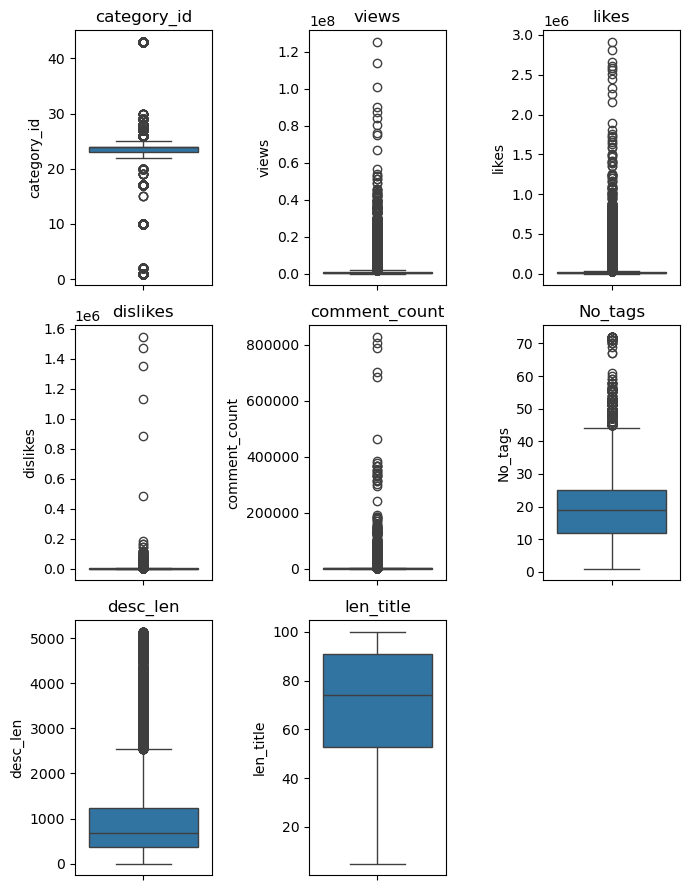

In [13]:
fig, axes = plt.subplots(nrows=int(np.ceil(len(numeric_col)/3)), ncols=3, figsize=(7, 9))
axes = axes.flatten()

for i, col in enumerate(numeric_col):
    sns.boxplot(y=df[col], ax=axes[i])
    axes[i].set_title(col)

# Hide any unused subplots
for j in range(len(numeric_col), len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()

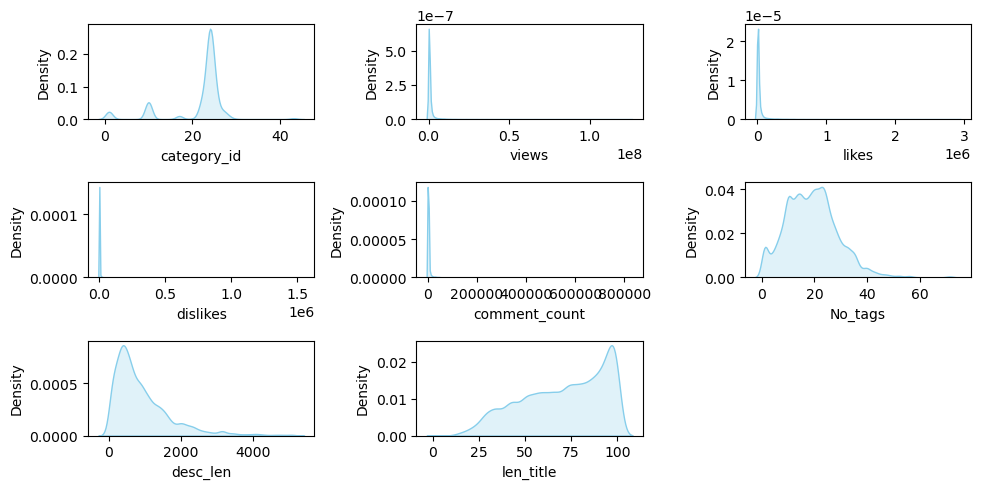

In [14]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(10, 5))
axes = axes.flatten()

for i, col in enumerate(numeric_col):
    sns.kdeplot(df[col], ax=axes[i], fill=True, color='skyblue')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Density')

for j in range(len(numeric_col), len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()

## Multivariate Analisys

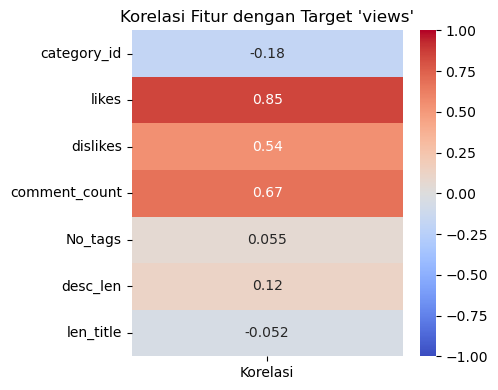

In [15]:
numerical_cols = df.select_dtypes(include=['float64', 'int64'])

# Hitung korelasi terhadap 'exclusive' dan ubah ke DataFrame (dengan kolom)
correlation_with_target = numerical_cols.corr()['views'].drop('views').to_frame()

# Optional: beri nama kolom agar lebih jelas
correlation_with_target.columns = ['Korelasi']

# Plot heatmap
plt.figure(figsize=(5, 4))
sns.heatmap(correlation_with_target, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Korelasi Fitur dengan Target 'views'")
plt.tight_layout()
plt.show()


<Axes: >

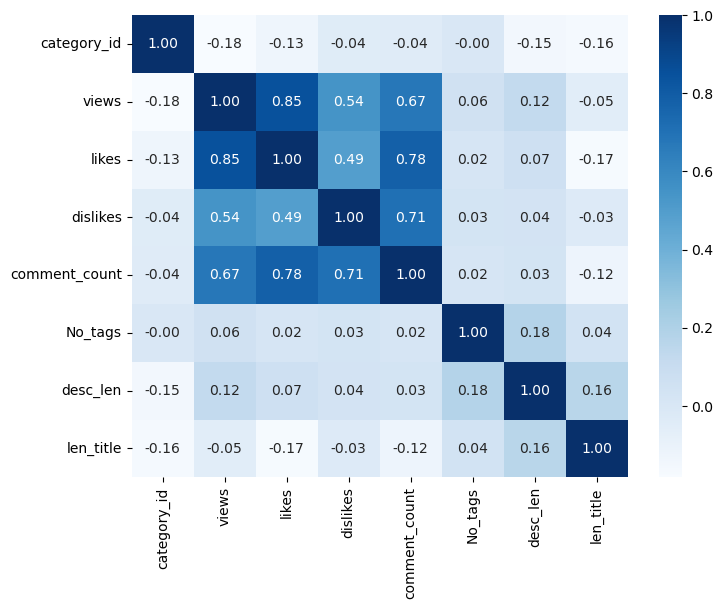

In [16]:
plt.figure(figsize=(8, 6))
sns.heatmap(numerical_cols.corr(), cmap='Blues', annot=True, fmt='.2f')

## Data Cleansing

### Handle missing values

In [17]:
df_cleaned = df.copy()
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36791 entries, 0 to 36790
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   trending_date           36791 non-null  object        
 1   title                   36791 non-null  object        
 2   channel_title           36791 non-null  object        
 3   category_id             36791 non-null  int64         
 4   publish_time            36791 non-null  object        
 5   tags                    36791 non-null  object        
 6   views                   36791 non-null  int64         
 7   likes                   36791 non-null  int64         
 8   dislikes                36791 non-null  int64         
 9   comment_count           36791 non-null  int64         
 10  comments_disabled       36791 non-null  bool          
 11  ratings_disabled        36791 non-null  bool          
 12  video_error_or_removed  36791 non-null  bool  

In [18]:
df_cleaned.dropna(subset=['description'], inplace=True)

### Handle duplicate data

In [19]:
# Tampilkan semua baris yang terlibat dalam duplikasi
df_cleaned.duplicated(keep='first').sum()


np.int64(4228)

In [20]:
df_cleaned.drop_duplicates(keep='first', inplace=True)

Menyisakan satu baris awal dari dari data yang duplikat

### Menyesuaikan type data 

In [21]:
# ubah tyoedata kolom trending-date menjadi datetime
df_cleaned['trending_date'] = pd.to_datetime(df_cleaned['trending_date'])

# Mengubah kolom 'publish_time' menjadi tipe datetime
df_cleaned['publish_time'] = pd.to_datetime(df_cleaned['publish_time'], format='%H:%M:%S', errors='coerce')

In [22]:
df_cleaned.head()

,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed,description,No_tags,desc_len,len_title,publish_date
0,2017-11-14,Sharry Mann: Cute Munda ( Song Teaser) | Parmi...,Lokdhun Punjabi,1,1900-01-01 12:20:39,"sharry mann|""sharry mann new song""|""sharry man...",1096327,33966,798,882,False,False,False,Presenting Sharry Mann latest Punjabi Song Cu...,15,920,81,2017-11-12
1,2017-11-14,"पीरियड्स के समय, पेट पर पति करता ऐसा, देखकर दं...",HJ NEWS,25,1900-01-01 05:43:56,"पीरियड्स के समय|""पेट पर पति करता ऐसा""|""देखकर द...",590101,735,904,0,True,False,False,"पीरियड्स के समय, पेट पर पति करता ऐसा, देखकर दं...",19,2232,58,2017-11-13
2,2017-11-14,Stylish Star Allu Arjun @ ChaySam Wedding Rece...,TFPC,24,1900-01-01 15:48:08,Stylish Star Allu Arjun @ ChaySam Wedding Rece...,473988,2011,243,149,False,False,False,Watch Stylish Star Allu Arjun @ ChaySam Weddin...,14,482,58,2017-11-12
3,2017-11-14,Eruma Saani | Tamil vs English,Eruma Saani,23,1900-01-01 07:08:48,"Eruma Saani|""Tamil Comedy Videos""|""Films""|""Mov...",1242680,70353,1624,2684,False,False,False,This video showcases the difference between pe...,20,263,30,2017-11-12
4,2017-11-14,why Samantha became EMOTIONAL @ Samantha naga ...,Filmylooks,24,1900-01-01 01:14:16,"Filmylooks|""latest news""|""telugu movies""|""telu...",464015,492,293,66,False,False,False,why Samantha became EMOTIONAL @ Samantha naga ...,11,753,88,2017-11-13


## Handling outlier

In [23]:
print(f'Jumlah baris sebelum memfilter outlier: {len(df_cleaned)}')
numbs = ['views', 'likes', 'desc_len']
filtered_entries = np.array([True] * len(df_cleaned))
for col in numbs:
    Q1 = df_cleaned[col].quantile(0.25)
    Q3 = df_cleaned[col].quantile(0.75)
    IQR = Q3 - Q1
    low_limit = Q1 - (IQR * 1.5)
    high_limit = Q3 + (IQR * 1.5)

    filtered_entries = ((df_cleaned[col] >= low_limit) & (df_cleaned[col] <= high_limit)) & filtered_entries

df_cleaned = df_cleaned[filtered_entries]

print(f'Jumlah baris setelah memfilter outlier: {len(df_cleaned)}')

Jumlah baris sebelum memfilter outlier: 32518
Jumlah baris setelah memfilter outlier: 25510


## Feature enginering

### Feature Selection

Memnyeleksi feature numeric :
1. dislike, like, comment_count ketiganya memiliki nilai korelasi yang kuat satu sama lain, dan berkorelasi kaut juga dengan target, makan akan dipilih salah satu dengan korelasi paling kuat dengan targe yakni feature like saja yang diambil.
2. menghapus kolom No_tags dan len_title, karena memiliki nilai korelasi yang rendah 0,05 dan -0,05
3, menghapus kolom object karna berisi text saja dan sudah terwakilkan nilainya dengan kolom lain

In [24]:
#hapus kolom dislike, commend_count, No_tags, dan len_title
df_cleaned.drop(columns=['dislikes', 'comment_count', 'No_tags', 'len_title'], inplace=True)

In [25]:
#menghapus seluruh kolom yang bertype object
df_cleaned.drop(columns=df_cleaned.select_dtypes(include=['object']).columns, inplace=True)


In [26]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25510 entries, 1 to 36769
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   trending_date           25510 non-null  datetime64[ns]
 1   category_id             25510 non-null  int64         
 2   publish_time            25510 non-null  datetime64[ns]
 3   views                   25510 non-null  int64         
 4   likes                   25510 non-null  int64         
 5   comments_disabled       25510 non-null  bool          
 6   ratings_disabled        25510 non-null  bool          
 7   video_error_or_removed  25510 non-null  bool          
 8   desc_len                25510 non-null  int64         
 9   publish_date            25510 non-null  datetime64[ns]
dtypes: bool(3), datetime64[ns](3), int64(4)
memory usage: 1.6 MB


### Feature Encoding

In [27]:
df_cleaned['category_id'].unique()

array([25, 24, 10, 22, 23, 19, 28,  1, 27, 26, 29,  2, 43, 17, 20, 30, 15])

In [28]:
df_encoded = pd.get_dummies(df_cleaned, columns=['category_id'], prefix='category')


### Feature extraction

In [29]:
df_encoded.publish_date = pd.to_datetime(df_encoded.publish_date)
to_one_hot = df_encoded.publish_date.dt.day_name()
days = pd.get_dummies(to_one_hot)

In [30]:
day_names = df_encoded.publish_date.dt.day_name()
is_weekend = day_names.apply(lambda x : 1 if x in ['Saturday','Sunday'] else 0).to_frame()
is_weekend = is_weekend.rename(columns={'publish_date':'is_weekend'})

In [31]:
df_encoded = pd.concat([df_encoded, days], axis=1)
df_encoded= pd.concat([df_encoded, is_weekend], axis=1)
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25510 entries, 1 to 36769
Data columns (total 34 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   trending_date           25510 non-null  datetime64[ns]
 1   publish_time            25510 non-null  datetime64[ns]
 2   views                   25510 non-null  int64         
 3   likes                   25510 non-null  int64         
 4   comments_disabled       25510 non-null  bool          
 5   ratings_disabled        25510 non-null  bool          
 6   video_error_or_removed  25510 non-null  bool          
 7   desc_len                25510 non-null  int64         
 8   publish_date            25510 non-null  datetime64[ns]
 9   category_1              25510 non-null  bool          
 10  category_2              25510 non-null  bool          
 11  category_10             25510 non-null  bool          
 12  category_15             25510 non-null  bool       

## Modeling

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import RobustScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, HistGradientBoostingRegressor
from lightgbm import LGBMRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# ======================
# 1. PREPARE DATA
# ======================

# Load data (pastikan sudah preprocessed sebelumnya)
df = df_encoded.copy()  # Gunakan dataframe hasil encoding dan pembersihan

# Pilih fitur numerik dan boolean
features = df.select_dtypes(["float64", "int64", "boolean"]).columns
x = df[features].drop("views", axis=1)
y = df.views

# Split data menjadi train/test
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=1/3, random_state=42)

# Standarisasi hanya fitur X (bukan target y)
scaler = RobustScaler()
scaler.fit(xtrain)
xtrain_std = scaler.transform(xtrain)
xtest_std = scaler.transform(xtest)

# ======================
# 2. DEFINE EVALUATION
# ======================

def eval_model(name, model, xtrain, ytrain, xtest, ytest):
    ytrain_pred = model.predict(xtrain)
    ytest_pred = model.predict(xtest)

    print(f"\n\U0001F4C8 Model: {name}")
    print("\U0001F4CA Training Metrics:")
    print(" - R^2     :", round(r2_score(ytrain, ytrain_pred), 4))
    print(" - MAE     :", round(mean_absolute_error(ytrain, ytrain_pred), 4))
    print(" - RMSE    :", round(np.sqrt(mean_squared_error(ytrain, ytrain_pred)), 4))

    print("\U0001F4CA Testing Metrics:")
    print(" - R^2     :", round(r2_score(ytest, ytest_pred), 4))
    print(" - MAE     :", round(mean_absolute_error(ytest, ytest_pred), 4))
    print(" - RMSE    :", round(np.sqrt(mean_squared_error(ytest, ytest_pred)), 4))
    # ======================
    # 3. DETEKSI OVERFITTING / UNDERFITTING
    # ======================
    print("\n\U0001F6A7 Model Diagnosis:")
    if r2_train - r2_test > 0.15:
        print("⚠️  Overfitting terdeteksi → Model terlalu bagus di training, tapi buruk di testing.")
    elif r2_train < 0.6 and r2_test < 0.6:
        print("⚠️  Underfitting kemungkinan terjadi → Model gagal mempelajari pola baik dari data.")
    else:
        print("✅  Model generalisasi dengan baik.")
# ======================
# 3. TRAIN BASE MODELS
# ======================

models = {
    "LinearRegression": LinearRegression(),
    "RandomForest": RandomForestRegressor(random_state=42),
    "HistGradientBoosting": HistGradientBoostingRegressor(random_state=42),
    "LGBMRegressor": LGBMRegressor(random_state=42)
}

# for name, model in models.items():
#     model.fit(xtrain_std, ytrain)
#     eval_model(name, model, xtrain_std, ytrain, xtest_std, ytest)

In [48]:
def plot_regression_and_residuals(name, ytest, y_pred):
    # Buat 2 plot: regresi dan residual
    fig, axes = plt.subplots(1, 2, figsize=(14, 5))
    fig.suptitle(f"{name} – Regression & Residual Plot", fontsize=16)

    # === Plot 1: Regression (y_actual vs y_pred) ===
    sns.scatterplot(x=ytest, y=y_pred, ax=axes[0], alpha=0.5)
    sns.lineplot(x=ytest, y=ytest, ax=axes[0], color='red', linestyle='--')
    axes[0].set_title("Actual vs Predicted")
    axes[0].set_xlabel("Actual")
    axes[0].set_ylabel("Predicted")

    # === Plot 2: Residual (y_pred vs error) ===
    residuals = ytest - y_pred
    sns.scatterplot(x=y_pred, y=residuals, ax=axes[1], alpha=0.5)
    axes[1].axhline(0, linestyle='--', color='red')
    axes[1].set_title("Residuals vs Predicted")
    axes[1].set_xlabel("Predicted")
    axes[1].set_ylabel("Residuals")

    plt.tight_layout()
    plt.show()

In [50]:
def plot_diagnostics(name, model, xtest, ytest):
    y_pred = model.predict(xtest)
    residuals = ytest - y_pred

    fig, axes = plt.subplots(1, 2, figsize=(12, 5))
    fig.suptitle(f"🔍 Diagnostik Model: {name}", fontsize=14)

    # Scatter plot: Predicted vs Actual
    sns.scatterplot(x=ytest, y=y_pred, ax=axes[0])
    axes[0].set_xlabel("Aktual")
    axes[0].set_ylabel("Prediksi")
    axes[0].set_title("📈 Prediksi vs Aktual")
    axes[0].plot([ytest.min(), ytest.max()], [ytest.min(), ytest.max()], color='red', linestyle='--')

    # Residual plot
    sns.scatterplot(x=y_pred, y=residuals, ax=axes[1])
    axes[1].axhline(0, color='red', linestyle='--')
    axes[1].set_xlabel("Prediksi")
    axes[1].set_ylabel("Residual (Aktual - Prediksi)")
    axes[1].set_title("📉 Residual Plot")

    plt.tight_layout()
    plt.show()

In [ ]:
for name, model in models.items():
    model.fit(xtrain_std, ytrain)

    # Prediksi train dan test
    y_train_pred = model.predict(xtrain_std)
    y_test_pred  = model.predict(xtest_std)

    # Evaluasi dan analisis over/underfitting
    eval_model(name, model, xtrain_std, ytrain, xtest_std, ytest)
    # # Plot visualisasi
    # plot_regression_and_residuals(name, ytest, y_test_pred)


📈 Model: LinearRegression
📊 Training Metrics:
 - R^2     : 0.2871
 - MAE     : 192011.7417
 - RMSE    : 269467.132
📊 Testing Metrics:
 - R^2     : 0.2788
 - MAE     : 194741.2976
 - RMSE    : 273622.4451

🚧 Model Diagnosis:
⚠️  Underfitting kemungkinan terjadi → Model gagal mempelajari pola baik dari data.

📈 Model: RandomForest
📊 Training Metrics:
 - R^2     : 0.9385
 - MAE     : 50848.7959
 - RMSE    : 79144.435
📊 Testing Metrics:
 - R^2     : 0.5679
 - MAE     : 135611.7293
 - RMSE    : 211799.6499

🚧 Model Diagnosis:
⚠️  Underfitting kemungkinan terjadi → Model gagal mempelajari pola baik dari data.

📈 Model: HistGradientBoosting
📊 Training Metrics:
 - R^2     : 0.564
 - MAE     : 140775.6719
 - RMSE    : 210737.4462
📊 Testing Metrics:
 - R^2     : 0.4927
 - MAE     : 151645.0942
 - RMSE    : 229472.34

🚧 Model Diagnosis:
⚠️  Underfitting kemungkinan terjadi → Model gagal mempelajari pola baik dari data.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of tes

Fitting 3 folds for each of 48 candidates, totalling 144 fits
🔍 Best Parameters: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}

📈 Model: RandomForest (Tuned)
📊 Training Metrics:
 - R^2     : 0.9404
 - MAE     : 49619.1056
 - RMSE    : 77890.2178
📊 Testing Metrics:
 - R^2     : 0.5656
 - MAE     : 134463.8609
 - RMSE    : 212341.6833

🚧 Model Diagnosis:
⚠️  Underfitting kemungkinan terjadi → Model gagal mempelajari pola baik dari data.


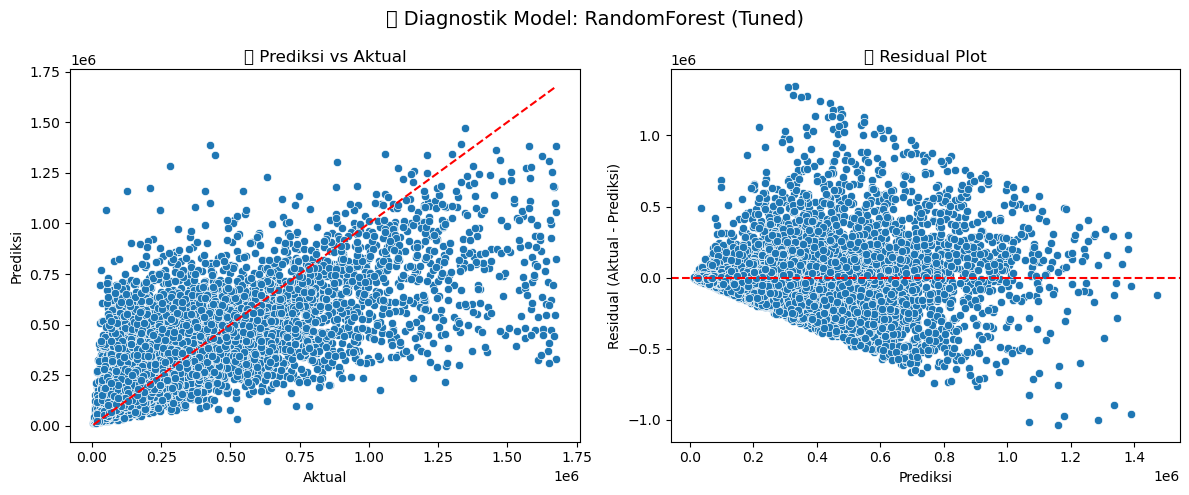

In [51]:
from sklearn.model_selection import GridSearchCV

# ======================
# 5. TUNING RANDOM FOREST
# ======================

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['auto', 'sqrt']
}

# Buat model dasar
rf = RandomForestRegressor(random_state=42)

# Buat grid search
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=3,
    scoring='r2',
    n_jobs=-1,
    verbose=2
)

# Fit pada data training yang sudah distandarisasi
grid_search.fit(xtrain_std, ytrain)

# Tampilkan parameter terbaik
print("🔍 Best Parameters:", grid_search.best_params_)

# Model terbaik hasil tuning
best_rf = grid_search.best_estimator_

# Evaluasi ulang model yang dituning
eval_model("RandomForest (Tuned)", best_rf, xtrain_std, ytrain, xtest_std, ytest)
plot_diagnostics("RandomForest (Tuned)", best_rf, xtest_std, ytest)